In [ ]:
# load packages
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import sympy as sym
import matplotlib.pyplot as plt
from numpy.linalg import eig
%matplotlib inline

# Please read all instructions and questions carefully
If you need clarification please ask.

- For the free response answers please provide succinct yet sufficient answers that show you understand the "why" behind the code and math we are learning. They are not intended to trick you or need elaborate responses. **They should be 1-2 sentences max.** (Points will be taken off if your answers are excessively long)

- For your code, please refer to numpy/seaborn/matplotlib documentation when you have questions on usage of functions.

- Your code needs to be fully reproducible (it needs to run on google colab from start to finish after the kernel is restarted). Points will be taken off if it is not reproducible.


## Honor Pledge (10 Points)

-- **On my honor as a student, I have neither given nor received aid on this assignment. -Emujin Batzorig** --

---

# Project 3: Principal Component Analysis (PCA) on the `iris` dataset

Principal Component Analysis (PCA) is a simple dimensionality reduction technique that can capture linear correlations between the features. For a given (standardized) data, PCA can be calculated by eigenvalue decomposition of the covariance (or correlation) matrix of the data, or Singular Value Decomposition (SVD) of the data matrix. The data standardization includes mean removal and variance normalization.




---


# Data

### `iris` dataset overview:



>  Load dataset and split into `data` and `target`

Our data (or X) will include the columns sepal length, sepal width, petal length, and petal width)

Our target (or y) will be our species column

In [ ]:
iris = load_iris()

A pandas dataframe is a more convenient structure for some initial analysis of the dataset

In [ ]:
# Create our features dataframe
iris_df = pd.DataFrame(iris.data, columns=(iris.feature_names))
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
n_samples, n_features = iris_df.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


Add the species to the dataframe

In [ ]:
# Add our target (y) variable to our dataframe
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Q1 (2.5 pt):
Using `sns.pairplot()` (reference the documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html), create a pairplot with histograms on the diagonal. Please use only the parameters needed (you do not need to specify the default parameters for the function). For reference on how to use functions and specify parameters, please refer to the section "What is a function and how to use it" in Lab 3 and your associated notes.

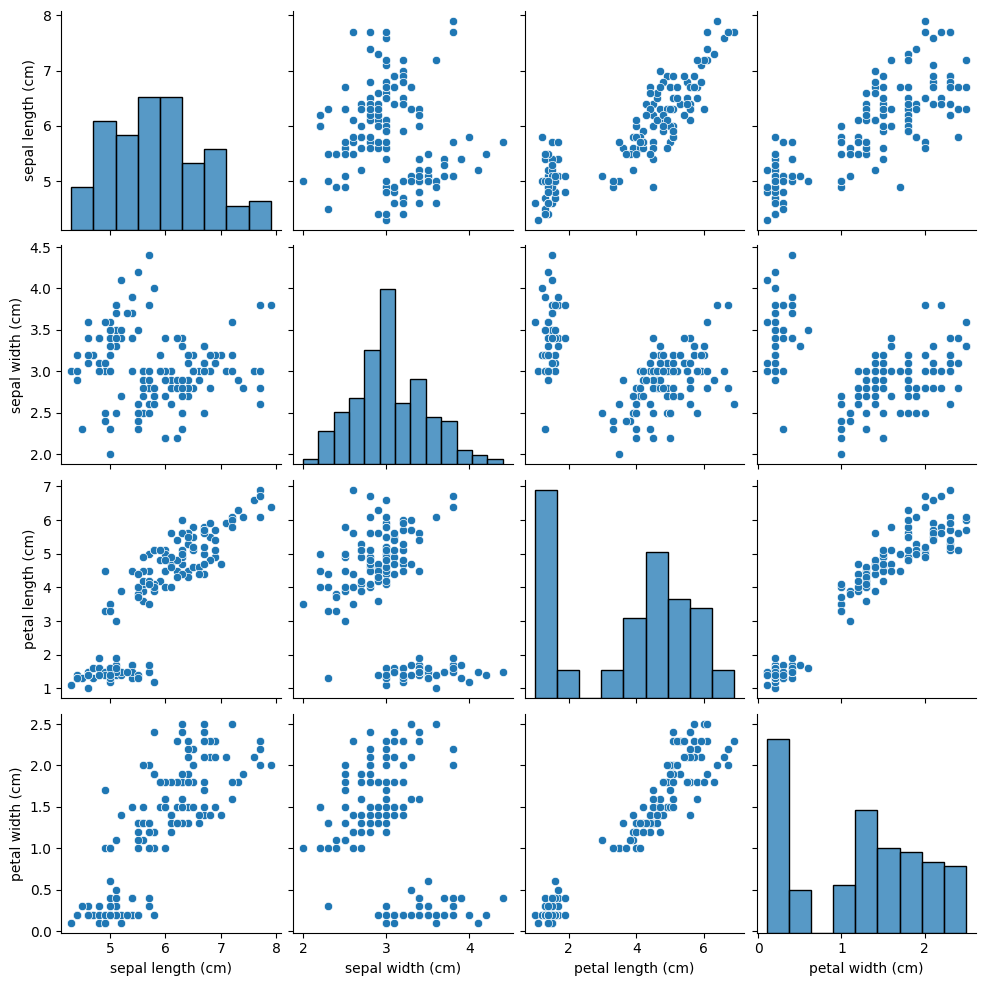

In [ ]:
# ANSWER HERE

sns.pairplot(iris_df)

## Q2 (2.5 pt):

**Question:** Please explain what the pairplot is showing. Why do we show histograms on the digaonal - i.e. what do they tell us? What general information do we gain from the pairplot, beyond just the diagonal?

**Answer:** The pairplot shows relationships between variables in the Iris dataset. The histogram on the diagonal shows distribution of each variable (because it corresponds to the same features instead of comparing two).

## Q3 (2.5 pt):
Using `sns.pairplot()` (reference the documentation), create the same pairplot with histograms on the diagonal that you made in Q2. This time, use the `hue` parameter to color the data points by what their target variable is.

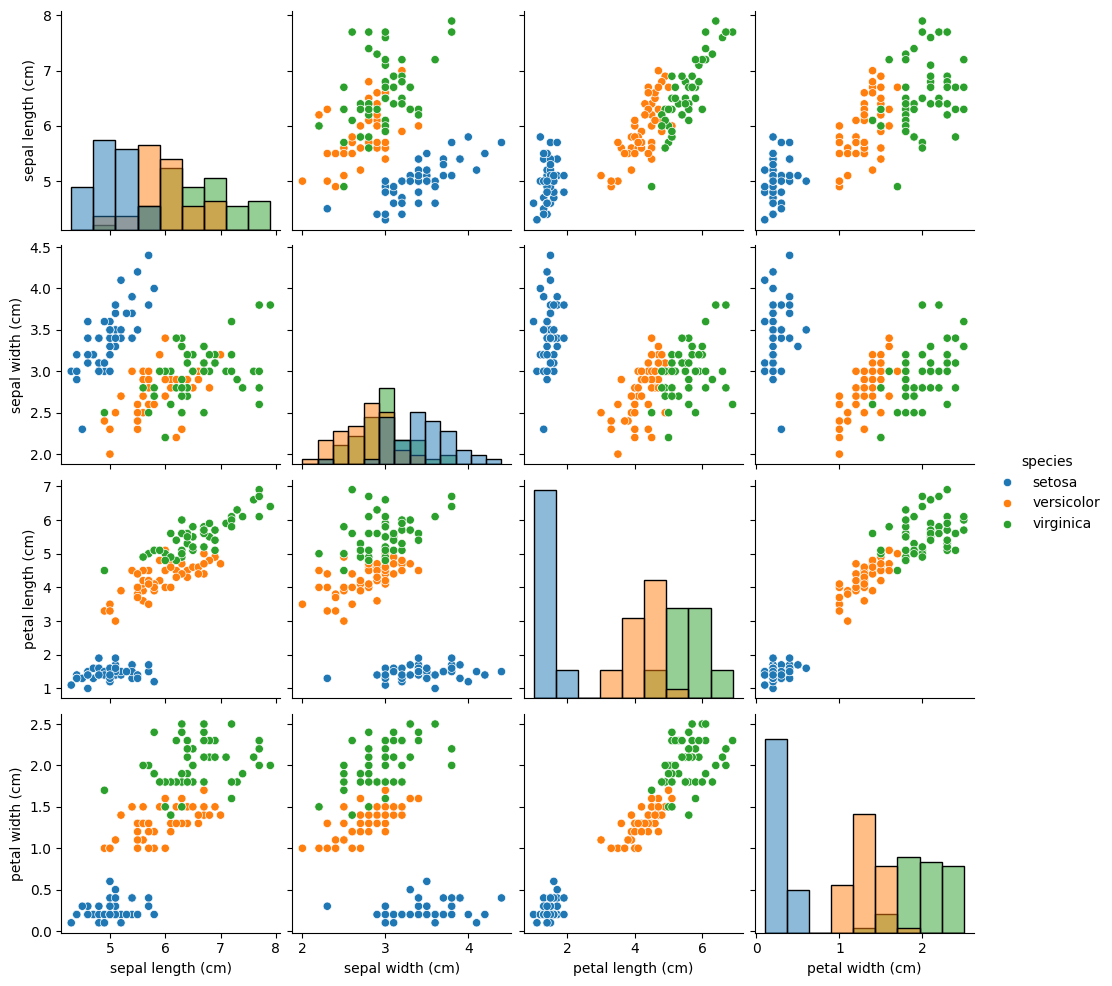

In [ ]:
# ANSWER HERE

sns.pairplot(iris_df, hue="species", diag_kind="hist")

## Q4 (2.5 pt):
**Question:** How does the hue parameter change the plot compared to the previous pair plot?

**Answer:** The hue parameter adds target variable (categorical data) into consideration and color codes the plots to show distribution of the target variable categorical levels in each feature.  

### **Sometimes, we want to have a smoother approximation of the feature distributions compared to the histogram. You can use obtain a smoother representation using the *densities* of each feature.**

## Q5 (2.5 pt):
Using `sns.pairplot()` (reference the documentation), create a pairplot with density plots on the diagonal rather than histograms. Again, use the hue parameter to color the data points based on their target variable.

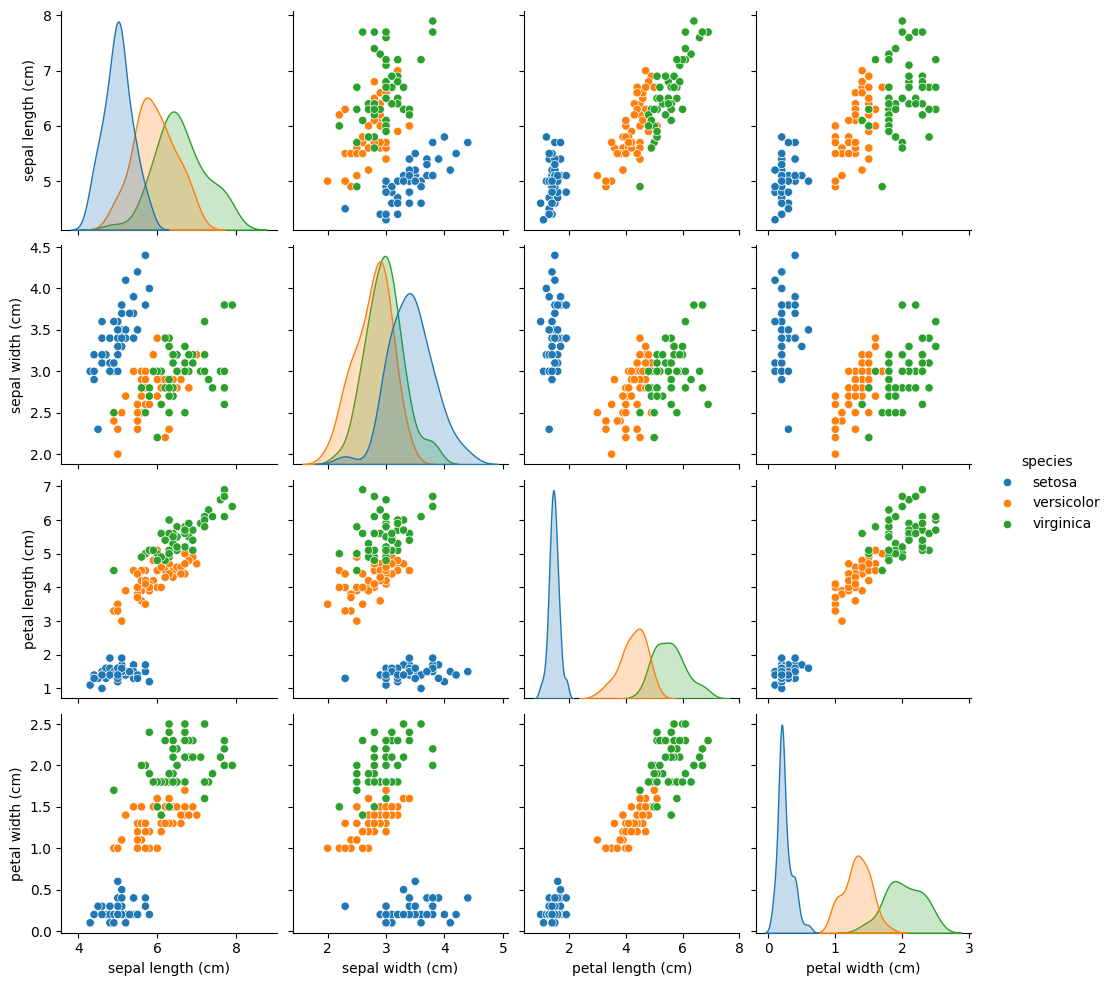

In [ ]:
# ANSWER HERE

sns.pairplot(iris_df, hue="species")

## Q6 (5 pt):
ONLY ON CANVAS IN LAB 8 QUIZ: Please upload screenshots showing where in the `seaborn` documentation the parameters you used for all 3 plots and their descriptions can be found (be sure to include documentation on the correct name for the above desnity plots and why they show up instead of histograms given the hue parameter). Please box or highlight the specific sections you used.

# **UPLOAD PHOTO(S) FOR Q6 TO LAB 8 QUIZ ON CANVAS** (not here)



---


# Time for PCA!


---

# 1. Standardize the data
## Q7 (2.5 pt):

Convert your dataframe to X and Y numpy arrays containing your features and labels respectively. Hint: you can use use `.iloc()` to select rows and columns from a pandas dataframe.

In [ ]:
# ANSWER HERE
X = iris_df.iloc[:, :4]
Y = iris_df.iloc[:, 4:5]
X = X.to_numpy()
Y = Y.to_numpy()

print(X[:5,:4]) #print first 5 rows all columns of x
print(Y[:5]) #print first 5 rows of y

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]


## Q8 (2.5 pt):

**Question:** What are the dimensions of our X (samples x **features**)


**Answer:** (150, 3) 150 samples x 4 features

## Q9 (2.5 pt):

**Question:** What are the dimensions of our y (samples x **target**)

**Answer:** (150, 1) 150 samples x 1 target feature


In [ ]:
print(X.shape)
print(Y.shape)

(150, 4)
(150, 1)


## Q10 (5 pts):

## The point of this exercise (Q10) is to challenge you to turn formulas into code using base python (i.e. no packages). This is not used elsewhere in the project.

Please calculate the standardized value of the first element of sepal length `X[0,0]` **WITHOUT USING ANY NUMPY FUNCTIONS**
- Only use base python (hint: use sum() instead of np.sum() and **0.5 instead of np.sqrt())

Please use the following formulas (they may render incorrectly if you open this file somewhere other than google colab):

### Mean:
\begin{equation}
\mu = \frac{1}{N} \sum_{i=1}^{N} x_i
\end{equation}

### Standard Deviation:
\begin{equation}
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
\end{equation}

Hints:
- `X[:,0]` pulls just the first column of X.
- N is the length of your dataframe (do not hardcode this value)
- Follow the equations very closely. They tell you exactly what to do.
- After calculating your mean and standard deviation, for your final value you will follow the same formula we normally use to calculate standardized values: X_std = (X-mean)/std

In [ ]:
# ANSWER HERE
# N is the length of the dataframe
N = len(X)
# Select the first value of sepal length
X00 = X[0,0]
print('First Value:', X00)

# Calculate the Mean of the First Column of X
val =  X[:,0]   # select the first column of X and assign it to the variable val (this is your xi)
mean = sum(val)/N  # calculate the mean of val
print('Mean:', mean)

# Calculate the Standard Deviation of the First Column of X
std = (sum((val - mean)**2)/N)**0.5
print('Standard Deviation:', std)

# Calculate the Standardized value of the first element of sepal length
X00_std = (X00 - mean)/std
print('Standardized Value:', X00_std)


First Value: 5.1
Mean: 5.843333333333335
Standard Deviation: 0.8253012917851409
Standardized Value: -0.9006811702978099


## Q11 (2.5 pts):
Now use `np.mean()` and `np.std()` to standardize all **columns** of your data. You should use the same code we learned in Lab 4 and Project 2. **Be careful to specify your axis.** We will be using this value going forward (in Q13 and Q24).

In [ ]:
# ANSWER HERE
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X_std = (X - means) / stds ### specifying axis is VERY important or else it standardizes over entire flattened array

print(X_std[0,0]) #print X[0,0] after standardization, Hint: this should equal X00_std from the previous question

-0.9006811702978099


## Q12 (2.5 pt) :
**Question:** Why do we need to standardize our data for PCA? (i.e. what happens to our covariance matrix and eigenvalues/vectors if we do or don't)

**Answer:** Since PCA relies on variance, different features may have different scales. Not standardizing our data may lead to biased covariance matrix and eigenvalues due to different scales of the features.


---

# 2. Create your Covariance Matrix

## Q13 (5 pt):
In general notation, our covariance matrix is equal to:

\begin{equation}
  Cov = \frac{(X^TX)}{|X|}
\end{equation}

where $|X|$ is the length of X.

Please use this formula to calculate the covariance matrix from our standardized X values `X_std`. Remember that `@` calculates the matrix multiplication of two matrices in Python. It is equivalent to `np.matmul()`. Also `.T` performs the transpose of a matrix.

In [ ]:
# ANSWER HERE - covariance matrix
cov_mat =  (X_std.T @ X_std) / len(X_std)# define your covariance matrix here (** please use the formula provided above with the variable X_std **)

cov_mat #leave this line in at the end to print the matrix in the notebook

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Your answer should follow this pattern (remember the relationship between variance and covariance we talked about in lab):

> covariance matrix = $\left[\begin{array}{ccc}
				\text{Var}(a_1)&  \cdots  & \text{Cov} (a_n, a_1)\\
				 \vdots  & \ddots & \vdots \\
				\text{Cov} (a_n, a_1)& \cdots &\text{Var}(a_n)\\
				\end{array}\right]$

## Q14 (2.5 pt):
**Question:** Why is there a diagnal of 1s in your covariance matrix?

**Answer:** Those values represent variances of each feature by itself. Since we standardized the data, each feature has s.d. of 1 which means it will also have a variance of 1 (1**1=1).

## Q15 (2.5 pt):
**Question:** Why do we need to standardize $X^T X$ by the length of our data to achieve the covariance matrix we use to calculate our eigenvalues/vectors?

**Answer:** We standardize in order to get eigenvalues and eigenvectors that are easy to interpret and makes sense in the PCA context. If we don't standardize, we end up with too large eigenvalues and the covariance matrix wouldn't have 1s in the diagonal.

---

# 3. Find the Eigenvalues and Eigenvectors

## Q16 (2.5pt):
Use Numpy's `np.linalg.eig()` function to find the eigenvalues and eigenvectors of your covariance matrix.





In [ ]:
# ANSWER HERE
eig, eigvec = np.linalg.eig(cov_mat)# solve for the eigenvalues and eigenvectors here


## Q17 (5 pt):
List each eigenvalue followed by it's associated eigenvector in order of greatest to least variance (loop through your outputs from Q16). Print out the results.

In [ ]:
### ANSWER HERE

for i in range(len(eig)):
  print(eig[i], eigvec[:,i])

2.918497816531998 [ 0.52106591 -0.26934744  0.5804131   0.56485654]
0.9140304714680683 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
0.1467568755713149 [-0.71956635  0.24438178  0.14212637  0.63427274]
0.020714836428619068 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]


## Q18 (2.5pt):
**Question:** What did you notice about how Numpy's function sorts the variables it returns? (Hint: Look at the order of the eigenvalues)

**Answer:** I noticed that it sorts the eigenvalues in a descending order (highest to lowest) and prints out the associated eigenvectors.

---

# 4. Select principal components



## Q19 (5 pt):
Create the **projection matrix**, `W`, who has columns PC1 and PC2. PC1 and PC2 are the $2$ eigenvectors we want to graph associated with the two largest eigenvectors. (PC1 vs PC2, aka the eigenvectors associated with the top 2 largest eigenvalues)

\begin{gather}
  W = \begin{pmatrix}
    \vert & \vert \\
    PC1 & PC2 \\
    \vert & \vert
  \end{pmatrix}
\end{gather}




In [ ]:
# ANSWER HERE
# Hint: Eigenvectors are the columns of the matrix, not the rows (use indexing on your eigenvectors variable to create W)
W = np.column_stack((eigvec[:, 0], eigvec[:, 1])) # selecting first and second columns of result in Q17

W # leave this line in at the end

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

## Q20 (5 pt):

Calculate the **explained variance** (the variance that each principal component explains in the dataset)

PC1 should explain the most variance, PC4 should explain the least variance \\
> for eigenvalues $\{\lambda_1, \lambda_2, ... \lambda_n\}$, the **explained variance** of eigenvalue $\lambda_j$ is:

 $$\lambda_j = 100 \times \frac{\lambda_j}{\sum_{i = 1}^{n}\lambda_i}$$

 Using this formula, calculate the explained variance of each eigenvalue (4 total). You will need a for loop as we want the explained variance for each eigenvalue individually.

In [ ]:
# ANSWER HERE
eig_vals_total = sum(eig)        #calculate the total variance from your eigenvalues (the denominator of the function provided above)
explained_variance = 100 * (eig/eig_vals_total)     #calculate the explained variance from your eigenvalues (using the function provided above)

explained_variance = [round(x,2) for x in explained_variance] #leave this line in at the end
print("Explained variance:", explained_variance) #leave this line in at the end

Explained variance: [np.float64(72.96), np.float64(22.85), np.float64(3.67), np.float64(0.52)]


## Q21 (2.5 pt):
**Question:** What does the sum of your explained variance equal? Why?

**Answer:** Because each explained variance represents the portion of the total variance that can be explained by each PCs. Thus, the sum would equal to 100, representing that the variance is fully explained by all 4 PCs.

In [ ]:
sum(explained_variance)

np.float64(100.0)

## Q22 (2.5 pt):

Calculate the **cumulative explained variance** using `np.cumsum()`.

In [ ]:
# ANSWER HERE
c_explained_variance = np.cumsum(explained_variance)

# GIVEN
print("Cumulative explained variance:", c_explained_variance) #leave this line in at the end

Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


## Q23 (5 pt)

**Plot the cumulative explained variance for each component**

Hints:
- The x-axis should be your number of components (1-4)
- The y-axis should be your c_explained_variance
- Used plt.plot with the parameter '-o' to create dots in your line graph

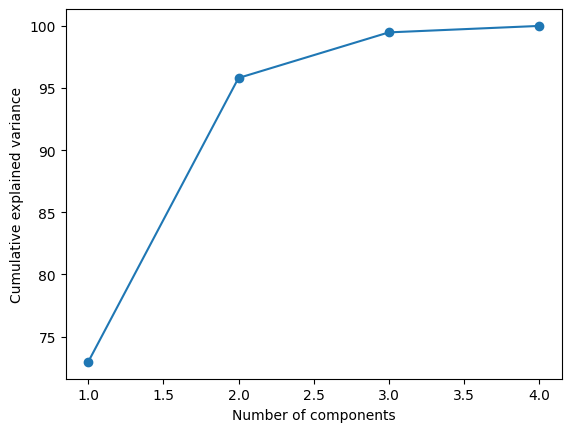

In [ ]:
# ANSWER HERE
x_axis = [1, 2, 3, 4]
plt.plot(x_axis, c_explained_variance, '-o') # fill in the function
plt.xticks() # fill in the function

plt.xlabel('Number of components') #leave this line in at the end
plt.ylabel('Cumulative explained variance'); #leave this line in at the end
plt.show() #leave this line in at the end

---

# 5. Project the data


## Q24 (5 pt):

> Use your projection matrix `W` to project data `X_std` onto a $2$ dimensional subspace (remember to check the shapes of your matrices and the order of your matrices in your matrix multiplication!)

Hint: Think about what it means to "project" a matrix onto a subspace in terms of matrix multiplication

In [ ]:
print(X_std.shape)
print(W.shape)

(150, 4)
(4, 2)


In [ ]:
# ANSWER HERE
X_proj = X_std @ W
print(X_proj.shape) #leave this line in at the end

(150, 2)


## Q25 (5 pt):
Use `plt.scatter` to plot the projected data. Color by `y` , as this is the different types of flowers in the `iris` dataset. The title should show the explained **variance** of principal components 1 and 2. PC1 should be on the x-axis and PC2 should be on the y-axis.

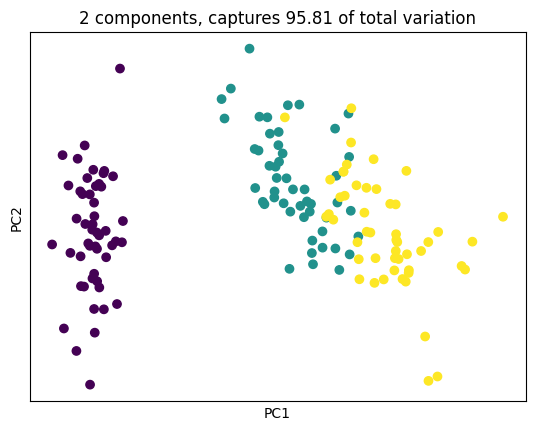

In [ ]:
Y = iris['target'] #leave this line in

# ANSWER HERE - plot and calculate the total explained variance (ev) of PC1 + PC2
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=Y) #fill in to plot
ev = explained_variance[0] + explained_variance[1] #calculate the total explained variance (ev) of PC1 + PC2

plt.xlabel('PC1'); plt.xticks([]) #leave this line in
plt.ylabel('PC2'); plt.yticks([]) #leave this line in
plt.title('2 components, captures {} of total variation'.format(ev)) #leave this line in
plt.show() #leave this line in

## Q26 (2.5 pt):
**Question:** How much explained variance is captured by both PC1 and PC2?

**Answer:** 95.81

## Q27 (2.5 pt):
**Question:** There is a trade-off between variance captured and lower-complexity in our model. What are the pros and cons of this trade-off?

**Answer:** When we reduce the complexity in our model (reducing dimensionality), we lose interpretability, but we also gain simplicity.